
                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

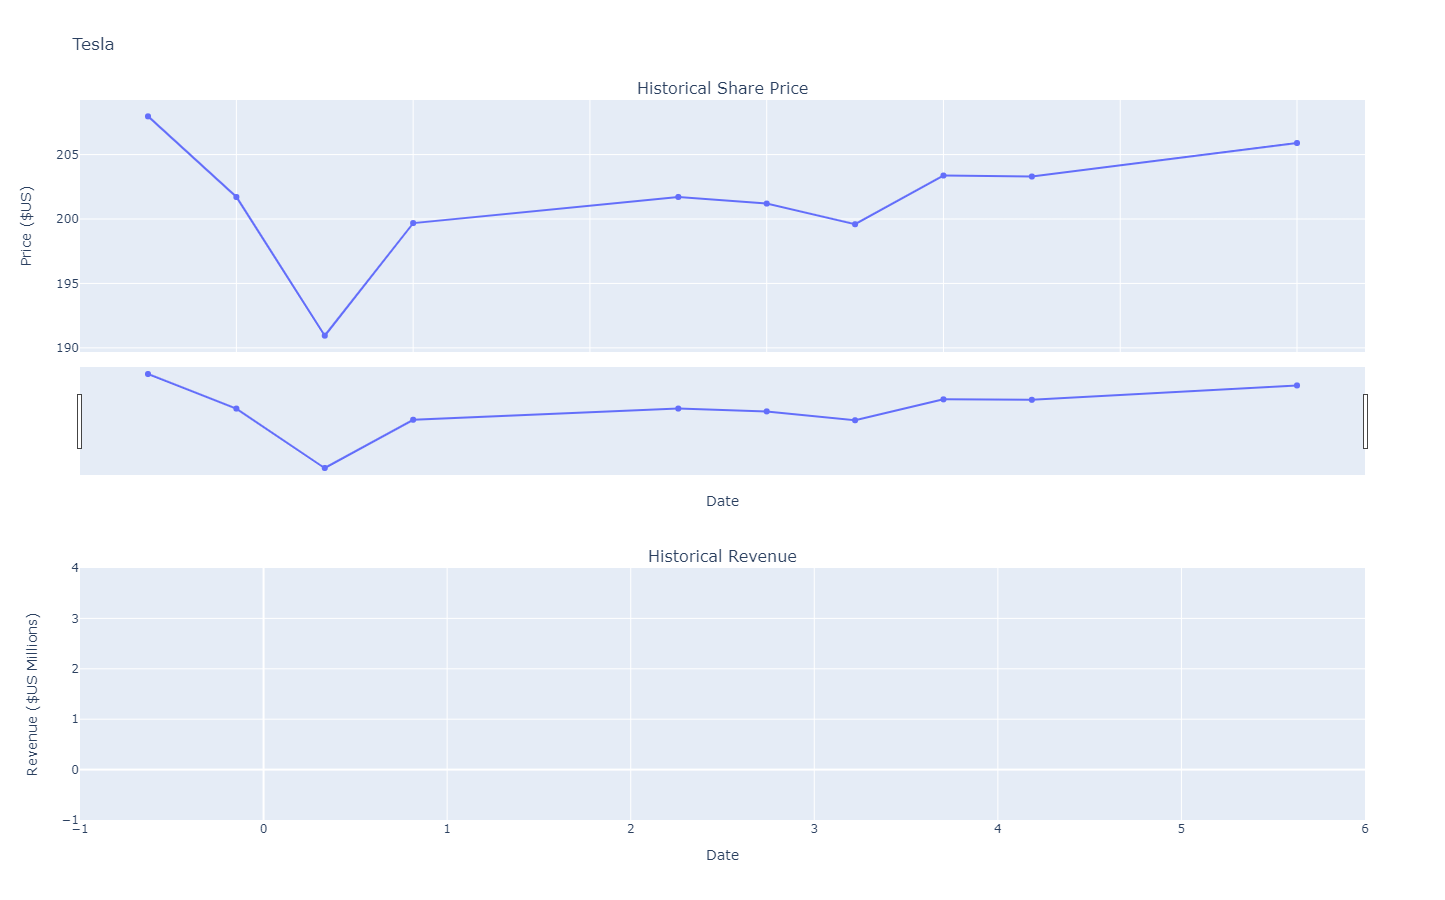

 Question 6


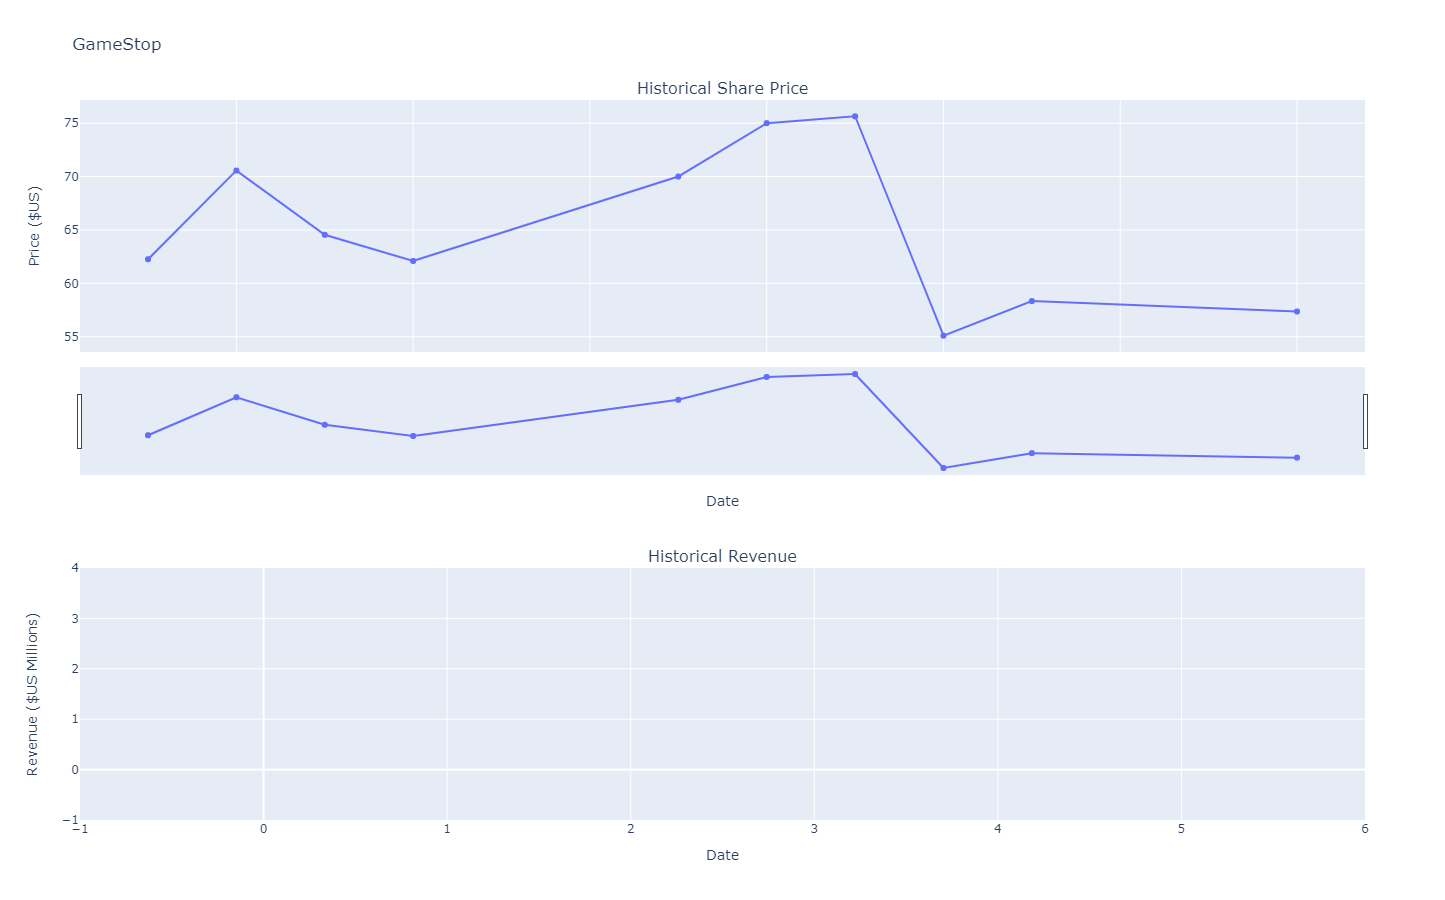

In [7]:

!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots



#Question 1
print(" Question 1")

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

tsla = yf.Ticker("TSLA")

tesla_data = tsla.history(period="max")

tesla_data.reset_index(inplace=True)
print(tesla_data.head())




#Question 2
print(" Question 2")

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Descargar pág web
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
print("html_data")

#Pasar datos HTML
soup = BeautifulSoup(html_data, "html.parser")

#Usar pandas para leer tabla
html_data = pd.read_html(str(soup))
tesla_revenue = html_data[1]

#Cambio de nombre columnas
tesla_revenue.columns = ["Date", "Revenue"]

#Limpieza de columnas
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

#Eliminar valores nulos
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())



#Question 3
print(" Question 3")

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
print(gme_data.head())






#Question 4
print(" Question 4")

#Descargar pág web
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text


#Pasar datos HTML
soup = BeautifulSoup(html_data, "html.parser")

# leer tabla
html_data = pd.read_html(str(soup))
gme_revenue = html_data[1]

#Cambio de nombre columnas
gme_revenue.columns = ["Date", "Revenue"]

#Limpieza de columnas
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

print(gme_revenue.tail())





#Question 5
print(" Question 5")

# Filtrar datos para junio de 2021
tesla_data_june = tesla_data[(tesla_data['Date'] >= '2021-06-01') & (tesla_data['Date'] <= '2021-06-30')]
tesla_revenue_june = tesla_revenue[(tesla_revenue['Date'] >= '2021-06-01') & (tesla_revenue['Date'] <= '2021-06-30')]

# Graficar datos de Tesla
make_graph(tesla_data_june, tesla_revenue_june, 'Tesla')







#Question 6
print(" Question 6")

# Filtrar datos para junio de 2021
gme_data_june = gme_data[(gme_data['Date'] >= '2021-06-01') & (gme_data['Date'] <= '2021-06-30')]
gme_revenue_june = gme_revenue[(gme_revenue['Date'] >= '2021-06-01') & (gme_revenue['Date'] <= '2021-06-30')]

# Graficar datos de GME
make_graph(gme_data_june, gme_revenue_june, 'GameStop')



